In [1]:
import bpy
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from PIL import Image 
import warnings
from helper_functies import *
from IPython.display import Image as JupImage
import imageio
import bmesh
import mathutils
from mathutils import Vector

tmpdir=tempfile.TemporaryDirectory()
size = [480,640]
my_dpi = 96 # Afhankelijk van monitor
def get_img(tmpdir=tmpdir, size=size):
    scene = bpy.context.scene
    scene.render.resolution_x = size[1]
    scene.render.resolution_y = size[0]
    scene.render.resolution_percentage = 100
    scene.render.filepath=tmpdir.name+"/image"
    bpy.ops.render.render(write_still=True)
    img=Image.open(tmpdir.name+"/image.png")
    return img

(  0.0010 sec |   0.0010 sec) Importing OBJ 'obj/test.obj'...
  (  0.0010 sec |   0.0000 sec) Parsing OBJ file...
    (  0.0162 sec |   0.0152 sec) Done, loading materials and images...
    (  0.0172 sec |   0.0162 sec) Done, building geometries (verts:2181 faces:597 materials: 1 smoothgroups:0) ...
    (  0.0252 sec |   0.0242 sec) Done.
  (  0.0252 sec |   0.0242 sec) Finished importing: 'obj/test.obj'
Progress: 100.00%

Imported name:  test.003


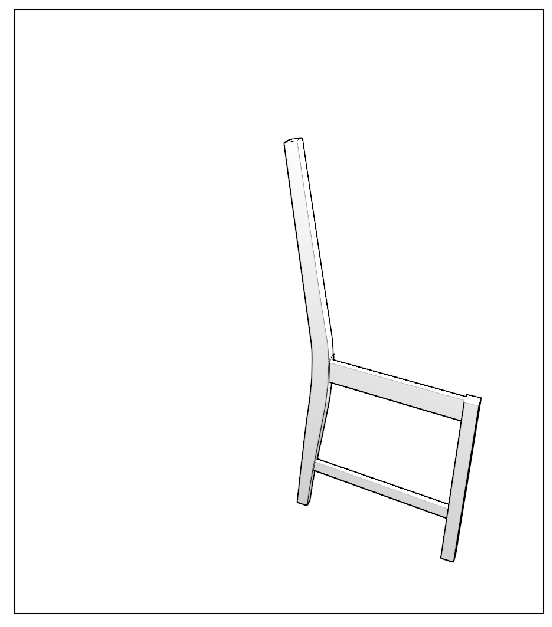

In [5]:
zero(my_dpi)
#Set the light, RECOMMENDED TYPE :  SUN or POINT 
bpy.ops.object.lamp_add(type='SUN',location=(5,2,1))

#Load meshes .obj
file_loc = 'obj/test.obj'
imported_object = bpy.ops.import_scene.obj(filepath=file_loc)
obj_object = bpy.context.selected_objects[0]
bpy.ops.transform.resize(value=(0.005, 0.005, 0.005)) # object scale
bpy.ops.transform.translate(value = (3, 0.5, -1.5)) # 3D world position
bpy.context.scene.render.use_edge_enhance = True
bpy.context.scene.render.edge_threshold = 255
bpy.context.scene.world.horizon_color = (1, 1, 1)
bpy.context.scene.render.use_shadows = False
print('Imported name: ', obj_object.name)

#Do render
bpy.ops.render.render()
bpy.data.images['Render Result'].save_render(filepath = '/tmp/image.png')
#Show Image
plt.imshow(get_img(size=[1024, 896]))
plt.xticks([]);plt.yticks([])
plt.show()
tmpdir.cleanup()